# 01/03

## 가중치 부여
## 다양한 모델 돌려보기, 스케일러 적용해보기

In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

get_ipython().run_line_magic('matplotlib','inline')

path = 'c:/Windows/Fonts/malgun.ttf'
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../EDA&Preprocessing/230103_company_add.csv')
df.head()

,Unnamed: 0,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,지역,홈페이지
0,0,(주)페이타랩,중소기업,3.0,52,4.0,114.71,64.71,56.41,4.3,부산 부산진구,passorder.co.kr
1,1,(주)엠제이플렉스,중소기업,3.0,930,17.0,89.94,97.84,108.78,2.3,서울 구로구,www.mjplex.co.kr
2,2,(주)앰진,중소기업,3.0,20,10.0,40.00,30.00,75.00,3.0,서울 송파구,www.amgine.co.kr
3,3,(주)도킹블록,중소기업,3.0,11,3.0,120.00,100.00,83.33,0.0,서울 강남구,dockingblock.com
4,4,(주)헥토이노베이션,중소기업,3.0,140,14.0,120.00,100.00,83.33,3.3,서울 강남구,https://www.hectoinnovation.co.kr/


In [4]:
df_md = df.iloc[:,1:-2]
df_md.head()

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점
0,(주)페이타랩,중소기업,3.0,52,4.0,114.71,64.71,56.41,4.3
1,(주)엠제이플렉스,중소기업,3.0,930,17.0,89.94,97.84,108.78,2.3
2,(주)앰진,중소기업,3.0,20,10.0,40.00,30.00,75.00,3.0
3,(주)도킹블록,중소기업,3.0,11,3.0,120.00,100.00,83.33,0.0
4,(주)헥토이노베이션,중소기업,3.0,140,14.0,120.00,100.00,83.33,3.3


In [5]:
df_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기업명     185 non-null    object 
 1   기업구분    185 non-null    object 
 2   기업구분코드  185 non-null    float64
 3   사원수     185 non-null    int64  
 4   업력      185 non-null    float64
 5   입사율(%)  185 non-null    float64
 6   퇴사율(%)  185 non-null    float64
 7   이직율(%)  185 non-null    float64
 8   별점      185 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 13.1+ KB


## 가중치

In [6]:
df_md['가중치'] = np.nan
df_md['추천'] = np.nan
df_md.head(3)

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,가중치,추천
0,(주)페이타랩,중소기업,3.0,52,4.0,114.71,64.71,56.41,4.3,NaN,NaN
1,(주)엠제이플렉스,중소기업,3.0,930,17.0,89.94,97.84,108.78,2.3,NaN,NaN
2,(주)앰진,중소기업,3.0,20,10.0,40.00,30.00,75.00,3.0,NaN,NaN


#### 기업구분(20), 사원수(10), 업력(10), 이직률(%)(30), 별점(30)에 따라서 가중치 부여

- 기업구분 : 중소10, 중견20, 대30, 기타15
- 사원수 : 사분위(10단위)
- 업력 : 사분위(10단위)  
- 이직률 : 사분위 / 1분위 이하 :0, 1분위~2분위:10, 2분위~3분위:20 ,3분위~ : 30
- 별점 : 0~10%: 0, 10~25%: 10, 25~50%: 15, 50~75%: 20, 75~90%: 25, 90%~: 35

In [7]:
df_md[['사원수','업력','이직율(%)','별점']].describe()

,사원수,업력,이직율(%),별점
count,185.000000,185.000000,185.000000,185.000000
mean,291.216216,14.891892,92.734649,2.697838
std,966.772897,9.775145,58.881789,0.901506
min,2.000000,1.000000,0.000000,0.000000
25%,27.000000,7.000000,62.350000,2.400000
50%,68.000000,14.000000,81.000000,2.700000
75%,197.000000,21.000000,105.240000,3.200000
max,9658.000000,55.000000,438.810000,5.000000


In [8]:
for idx, rows in df_md.iterrows():
    weight = 0
    # print(df_md.iloc[idx,])
    # 기업구분에 따라서
    if df_md.iloc[idx,1] == '중소기업':
        weight += 10*0.2
    elif df_md.iloc[idx,1] == '중견기업':
        weight += 20*0.2
    elif df_md.iloc[idx,1] == '대기업':
        weight += 30*0.2
    elif df_md.iloc[idx,1] == '기타':
        weight += 15*0.2
    
    # 사원수에 따라서    
    if df_md.iloc[idx,3] < 27.0:
        weight += 10*0.1
    elif df_md.iloc[idx,3] < 68.0:
        weight += 20*0.1
    elif df_md.iloc[idx,3] < 197.0:
        weight += 30*0.1
    else:
        weight += 40*0.1
        
    # 업력에 따라서
    if df_md.iloc[idx,4] < 7:
        weight += 10*0.1
    elif df_md.iloc[idx,4] < 14:
        weight += 20*0.1
    elif df_md.iloc[idx,4] < 21:
        weight += 30*0.1
    else:
        weight += 40*0.1
        
    # 이직률(%)에 따라서
    if df_md.iloc[idx,-4] < 62.35:
        weight += 0
    elif df_md.iloc[idx,-4] < 81.00:
        weight += 10*0.3
    elif df_md.iloc[idx,-4] < 105.24:
        weight += 20*0.3
    else:
        weight += 30*0.3
    
    # 별점에 따라서****
    if df_md.iloc[idx,-2] <= df_md['별점'].quantile(0.1):
        weight += 0
    elif df_md.iloc[idx,-2] <= df_md['별점'].quantile(0.25):
        weight += 10*0.3
    elif df_md.iloc[idx,-2] <= df_md['별점'].quantile(0.50):
        weight += 15*0.3
    elif df_md.iloc[idx,-2] <= df_md['별점'].quantile(0.75):
        weight += 20*0.3
    elif df_md.iloc[idx,-2] <= df_md['별점'].quantile(0.90):
        weight += 25*0.3
    else:
        weight += 35*0.3
    
    # print(weight)
    # print()
    
    df_md.loc[idx, '가중치'] = weight

In [9]:
df_md['별점'].describe()

count    185.000000
mean       2.697838
std        0.901506
min        0.000000
25%        2.400000
50%        2.700000
75%        3.200000
max        5.000000
Name: 별점, dtype: float64

In [10]:
df_md['별점'].quantile(0.75)

3.2

#### 가중치 잘 들어갔나 확인

In [11]:
df_md

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,가중치,추천
0,(주)페이타랩,중소기업,3.0,52,4.0,114.71,64.71,56.41,4.3,15.5,NaN
1,(주)엠제이플렉스,중소기업,3.0,930,17.0,89.94,97.84,108.78,2.3,28.5,NaN
2,(주)앰진,중소기업,3.0,20,10.0,40.00,30.00,75.00,3.0,18.5,NaN
3,(주)도킹블록,중소기업,3.0,11,3.0,120.00,100.00,83.33,0.0,20.5,NaN
4,(주)헥토이노베이션,중소기업,3.0,140,14.0,120.00,100.00,83.33,3.3,24.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
180,(주)유니텍,기타,4.0,36,33.0,8.82,23.53,266.78,2.2,28.5,NaN
181,(주)우리기술,기타,4.0,115,27.0,8.77,5.26,59.98,2.2,20.5,NaN
182,한국쓰리엠(주),기타,4.0,1686,45.0,7.25,8.00,110.34,3.7,30.5,NaN
183,에스지에이(주),기타,4.0,193,25.0,80.61,70.92,87.98,2.5,26.5,NaN


In [12]:
df_md.groupby('기업구분')['가중치'].describe()

,count,mean,std,min,25%,50%,75%,max
기업구분,,,,,,,,
기타,18.0,25.611111,3.909098,19.5,22.00,26.5,28.50,30.5
대기업,12.0,26.833333,4.097301,20.5,24.00,27.5,29.75,33.5
중견기업,24.0,26.041667,3.438644,18.5,25.25,26.5,27.75,31.5
중소기업,131.0,21.301527,3.730168,14.5,18.50,21.5,24.50,28.5


#### 별점 0 제외

In [13]:
df_md2 = df_md[df_md['별점'] != 0]

In [45]:
df_md2[df_md2['별점'] == 0]

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,가중치,추천


In [14]:
df_md2.groupby('기업구분')['가중치'].describe()

,count,mean,std,min,25%,50%,75%,max
기업구분,,,,,,,,
기타,18.0,25.611111,3.909098,19.5,22.0,26.5,28.5,30.5
대기업,11.0,27.409091,3.753786,21.5,24.5,27.5,30.0,33.5
중견기업,23.0,25.804348,3.308869,18.5,25.0,26.5,27.5,31.5
중소기업,124.0,21.451613,3.642243,14.5,18.5,21.5,24.5,28.5


## 추천여부 설정

In [15]:
df_md2.head(3)

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,가중치,추천
0,(주)페이타랩,중소기업,3.0,52,4.0,114.71,64.71,56.41,4.3,15.5,NaN
1,(주)엠제이플렉스,중소기업,3.0,930,17.0,89.94,97.84,108.78,2.3,28.5,NaN
2,(주)앰진,중소기업,3.0,20,10.0,40.00,30.00,75.00,3.0,18.5,NaN


In [16]:
df_md2['가중치'].mean()

22.818181818181817

In [17]:
df_md2.iloc[0,-2]

15.5

In [18]:
df_md2.iloc[0,-1]

nan

#### for문 돌리기 전에 인덱스 리셋(별점0점 삭제했으므로)

In [19]:
df_md2.reset_index(drop=True, inplace=True)

In [20]:
df_md2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기업명     176 non-null    object 
 1   기업구분    176 non-null    object 
 2   기업구분코드  176 non-null    float64
 3   사원수     176 non-null    int64  
 4   업력      176 non-null    float64
 5   입사율(%)  176 non-null    float64
 6   퇴사율(%)  176 non-null    float64
 7   이직율(%)  176 non-null    float64
 8   별점      176 non-null    float64
 9   가중치     176 non-null    float64
 10  추천      0 non-null      float64
dtypes: float64(8), int64(1), object(2)
memory usage: 15.2+ KB


#### 1차 : 가중치 22 이상이면 추천, 그렇지 않으면 비추천

In [21]:
for idx, rows in df_md2.iterrows():
    if df_md2.iloc[idx,-2] >= 22:
        df_md2.iloc[idx,-1] = 1
    else:
        df_md2.iloc[idx,-1] = 0

In [22]:
df_md2

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,가중치,추천
0,(주)페이타랩,중소기업,3.0,52,4.0,114.71,64.71,56.41,4.3,15.5,0.0
1,(주)엠제이플렉스,중소기업,3.0,930,17.0,89.94,97.84,108.78,2.3,28.5,1.0
2,(주)앰진,중소기업,3.0,20,10.0,40.00,30.00,75.00,3.0,18.5,0.0
3,(주)헥토이노베이션,중소기업,3.0,140,14.0,120.00,100.00,83.33,3.3,24.5,1.0
4,(주)세종분석연구원,중소기업,3.0,3,6.0,33.33,0.00,0.00,3.0,14.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
171,(주)유니텍,기타,4.0,36,33.0,8.82,23.53,266.78,2.2,28.5,1.0
172,(주)우리기술,기타,4.0,115,27.0,8.77,5.26,59.98,2.2,20.5,0.0
173,한국쓰리엠(주),기타,4.0,1686,45.0,7.25,8.00,110.34,3.7,30.5,1.0
174,에스지에이(주),기타,4.0,193,25.0,80.61,70.92,87.98,2.5,26.5,1.0


In [23]:
df_md2.groupby('기업구분')['추천'].count()

기업구분
기타       18
대기업      11
중견기업     23
중소기업    124
Name: 추천, dtype: int64

In [24]:
df_md2.groupby('기업구분')['추천'].sum()

기업구분
기타      13.0
대기업     10.0
중견기업    20.0
중소기업    57.0
Name: 추천, dtype: float64

#### 2차 : 가중치 23 이상이면 추천, 그렇지 않으면 비추천

In [25]:
for idx, rows in df_md2.iterrows():
    if df_md2.iloc[idx,-2] >= 23:
        df_md2.iloc[idx,-1] = 1
    else:
        df_md2.iloc[idx,-1] = 0

In [26]:
df_md2.groupby('기업구분')['추천'].sum()

기업구분
기타      13.0
대기업      9.0
중견기업    19.0
중소기업    47.0
Name: 추천, dtype: float64

- ==> 기타 18 -> 13, 대기업 11 -> 9
- ==> 중견 23 -> 19, 중소 124 -> 47

#### 사원수 int --> float 형변환

In [27]:
df_md2 = df_md2.astype({ '사원수' : 'float' })
df_md2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기업명     176 non-null    object 
 1   기업구분    176 non-null    object 
 2   기업구분코드  176 non-null    float64
 3   사원수     176 non-null    float64
 4   업력      176 non-null    float64
 5   입사율(%)  176 non-null    float64
 6   퇴사율(%)  176 non-null    float64
 7   이직율(%)  176 non-null    float64
 8   별점      176 non-null    float64
 9   가중치     176 non-null    float64
 10  추천      176 non-null    float64
dtypes: float64(9), object(2)
memory usage: 15.2+ KB


## 모델링
- 로버스트 스케일링 적용 or 적용하지 않은 결과 비교

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree    # 결정트리
from sklearn.ensemble import RandomForestClassifier           # 랜덤포레스트
from sklearn.linear_model import LogisticRegression           # 로지스틱 회귀
from xgboost import XGBClassifier                             # XGBoost
from sklearn.pipeline import Pipeline            
from sklearn.preprocessing import RobustScaler    # 로버스트 스케일러(이상치 영향 가장 적음)
from sklearn.metrics import accuracy_score

c:\anaconda\envs\ds_study\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


#### 1. 스케일러 적용 없이

In [29]:
df_md2.head(2)

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,가중치,추천
0,(주)페이타랩,중소기업,3.0,52.0,4.0,114.71,64.71,56.41,4.3,15.5,0.0
1,(주)엠제이플렉스,중소기업,3.0,930.0,17.0,89.94,97.84,108.78,2.3,28.5,1.0


In [30]:
X = df_md2.iloc[:,2:-2]
y = df_md2.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13, stratify=y)

np.unique(y_test, return_counts=True)

(array([0., 1.]), array([18, 18], dtype=int64))

In [31]:
import warnings
 
warnings.filterwarnings(action='ignore')

In [32]:
models = []
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('LogisticRegression', LogisticRegression()))
models.append(('XGBClassifier', XGBClassifier()))

In [33]:
from sklearn.model_selection import KFold, cross_val_score

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=13, shuffle=True)   # shuffle : 데이터 나누기 전에 섞기
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)  # 검증 결과 점수
    names.append(name)
    
    # 성능
    print(name, cv_results.mean(), cv_results.std())

DecisionTreeClassifier 0.85 0.07626484465736652
RandomForestClassifier 0.9071428571428571 0.048445214165180515
LogisticRegression 0.9285714285714286 0.0391230398217976
[10:05:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:05:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:05:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric us

#### 결과를 그래프로 확인

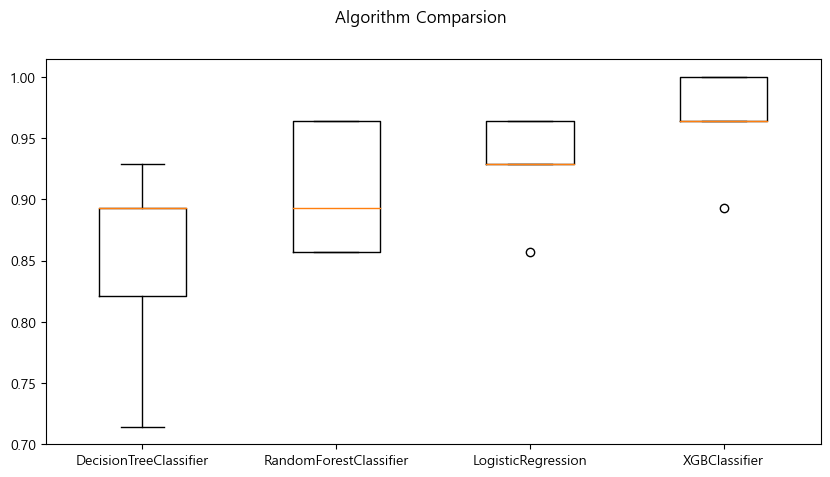

In [34]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithm Comparsion')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- 일단 보이는대로는 XGB, 로지스틱, 랜덤포레스트 순으로 유리해 보인다.

- XBG와 로지스틱을 사용해 보자

### XGBoost

In [35]:
xgb = XGBClassifier(eval_metric='mlogloss', n_estimators=400, learning_rate=0.3, max_depth=3)
xgb.fit(X_train.values, y_train)

print('Train ACC : ', accuracy_score(y_train, xgb.predict(X_train.values)))
print('Test ACC : ', accuracy_score(y_test, xgb.predict(X_test.values)))

Train ACC :  1.0
Test ACC :  0.9444444444444444


### 로지스틱 회귀

In [36]:
lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred = lr.predict(X_test)

print('Train ACC : ', accuracy_score(y_train, y_pred_tr)) 
print('Test ACC : ', accuracy_score(y_pred, y_pred))

Train ACC :  0.9428571428571428
Test ACC :  1.0


#### 2. 스케일러 적용 - RobustScaler

#### 로지스틱

In [40]:
estimators = [('scaler', RobustScaler()), ('clf', LogisticRegression())]
pipe = Pipeline(estimators)

In [41]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()), ('clf', LogisticRegression())])

In [43]:
y_pred_tr = pipe.predict(X_train)
y_pred = pipe.predict(X_test)

print('Train ACC : ', accuracy_score(y_train, y_pred_tr)) 
print('Test ACC : ', accuracy_score(y_pred, y_pred))

Train ACC :  0.9571428571428572
Test ACC :  1.0


#### GMBoost

In [44]:
estimators = [('scaler', RobustScaler()), ('clf', XGBClassifier())]
pipe = Pipeline(estimators)
pipe.fit(X_train, y_train)

y_pred_tr = pipe.predict(X_train)
y_pred = pipe.predict(X_test)

print('Train ACC : ', accuracy_score(y_train, y_pred_tr)) 
print('Test ACC : ', accuracy_score(y_pred, y_pred))

[14:38:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train ACC :  1.0
Test ACC :  1.0


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

# train score, test score, roc_auc_score 
def get_scores(model, xtrain, xtest, ytrain, ytest):
    A = model.score(xtrain, ytrain)
    B = model.score(xtest, ytest)
    ypred = model.predict(xtest)
    C = roc_auc_score(ytest, ypred)  
    return '{:.4f} {:.4f} {:.4f}'.format(A, B, C)
# 모델선택 
def make_models(xtrain, xtest, ytrain, ytest):
    model1 = LogisticRegression(max_iter=1000).fit(xtrain, ytrain)
    print('model1', get_scores(model1, xtrain, xtest, ytrain, ytest))
    for k in range(1, 10):
        model2 = KNeighborsClassifier(k).fit(xtrain, ytrain)
        print('model2', k, get_scores(model2, xtrain, xtest, ytrain, ytest))

    # overfitting
    model3 = DecisionTreeClassifier(random_state=0).fit(xtrain, ytrain)
    print('model3', get_scores(model3, xtrain, xtest, ytrain, ytest))

    # overfitting 해결
    for d in range(3, 8):
        model3 = DecisionTreeClassifier(max_depth=d,random_state=0).fit(xtrain, ytrain)
        print('model3', d, get_scores(model3, xtrain, xtest, ytrain, ytest))

    # overfitting
    model4 = RandomForestClassifier(random_state=0).fit(xtrain, ytrain)
    print('model4', get_scores(model4, xtrain, xtest, ytrain, ytest))

    # overfitting 해결
    for d in range(3, 8):
        model4 = RandomForestClassifier(500, max_depth=d, random_state=0).fit(xtrain, ytrain)
        print('model4', d, get_scores(model4, xtrain, xtest, ytrain, ytest))

    model5 = XGBClassifier(eval_metric='logloss', use_label_encoder=False).fit(xtrain, ytrain)
    print('model5', get_scores(model5, xtrain, xtest, ytrain, ytest))

#### 성능평가

In [38]:
def get_other_scores(model, xtest, ytest):
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    f1 = f1_score(ytest, y_pred)
    print(f'accuracy  : {accuracy:.4f}')
    print(f'precision : {precision:.4f}')
    print(f'recall    : {recall:.4f}')
    print(f'f1        : {f1:.4f}')

In [39]:
make_models(X_train,X_test,y_train,y_test)

model1 0.9643 0.9444 0.9444
model2 1 1.0000 0.9722 0.9722
model2 2 0.9286 0.8611 0.8611
model2 3 0.9429 0.9167 0.9167
model2 4 0.9143 0.8889 0.8889
model2 5 0.9429 0.9444 0.9444
model2 6 0.9143 0.9167 0.9167
model2 7 0.9214 0.9167 0.9167
model2 8 0.9071 0.8889 0.8889
model2 9 0.8929 0.9444 0.9444
model3 1.0000 0.8611 0.8611
model3 3 0.9643 0.8611 0.8611
model3 4 0.9714 0.8611 0.8611
model3 5 0.9929 0.8611 0.8611
model3 6 1.0000 0.8611 0.8611
model3 7 1.0000 0.8611 0.8611
model4 1.0000 1.0000 1.0000
model4 3 0.9857 0.9722 0.9722
model4 4 1.0000 0.9722 0.9722
model4 5 1.0000 0.9722 0.9722
model4 6 1.0000 0.9722 0.9722
model4 7 1.0000 0.9722 0.9722
model5 1.0000 0.9444 0.9444
